# Importing necessary libraries

In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import calendar
from pandas.tseries.holiday import USFederalHolidayCalendar
import time
import os

# Reading datasets into pandas DataFrames

In [65]:
train_data = pd.read_csv('train_data.csv')   # Load training data
val_data = pd.read_csv('val_data.csv')       # Load validation data
test_data = pd.read_csv('test_data.csv')     # Load test data

# Displaying the first two rows of each dataset for quick inspection

In [66]:
train_data.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.986,40.736,-73.980,40.760,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978,40.764,-73.992,40.750,N,827


In [67]:
val_data.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2542907,1,2016-01-10 16:01:46,1,-74.014,40.713,-73.994,40.753,N,1249
1,id1709406,1,2016-06-23 18:41:05,1,-74.005,40.727,-73.983,40.735,N,817


In [68]:
test_data.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2465947,1,2016-03-23 02:24:50,1,-73.989,40.749,-73.993,40.763,N,437
1,id0609375,1,2016-05-08 19:00:03,2,-74.013,40.716,-74.002,40.740,N,676


# checking for null values

In [69]:
train_data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

# Visualizing vendor distribution using bar and pie charts

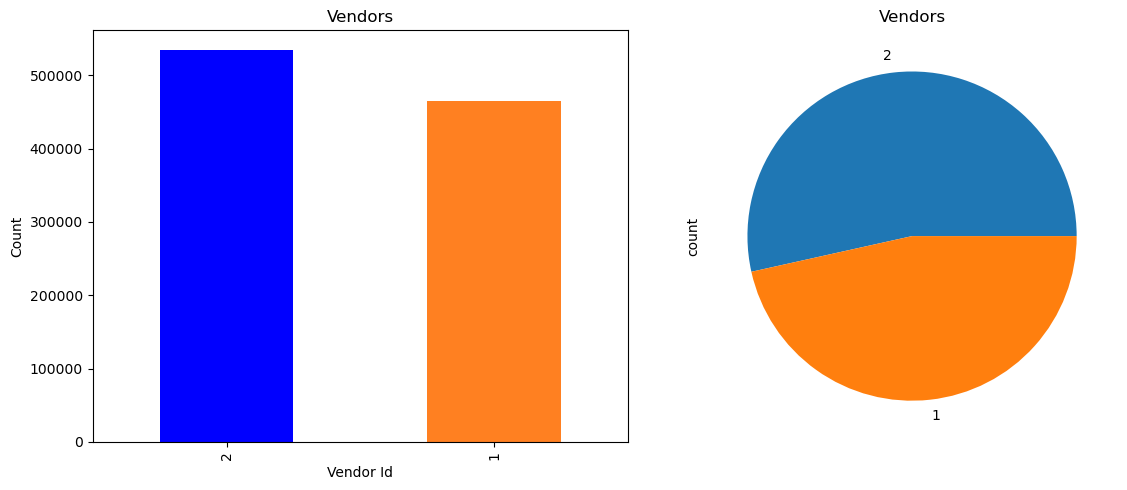

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax = train_data['vendor_id'].value_counts().plot(kind='bar',title="Vendors",ax=axes[0],color = ('blue',(1, 0.5, 0.13)))
train_data['vendor_id'].value_counts().plot(kind='pie',title="Vendors",ax=axes[1])
ax.set_ylabel("Count")
ax.set_xlabel("Vendor Id")
fig.tight_layout()

In [71]:
pd.options.display.float_format = '{:.2f}'.format #To suppress scientific notation.
train_data.passenger_count.value_counts()    # Checking the distribution of passenger counts

passenger_count
1    708628
2    143907
5     53635
3     41012
6     33287
4     19491
0        38
7         2
Name: count, dtype: int64

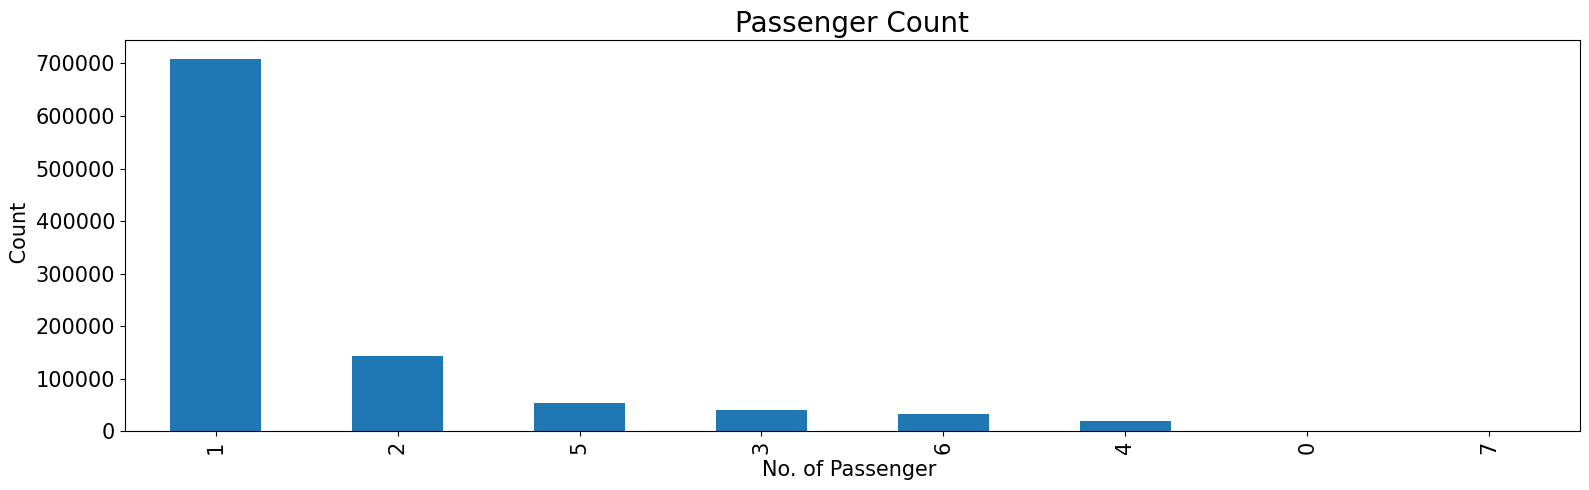

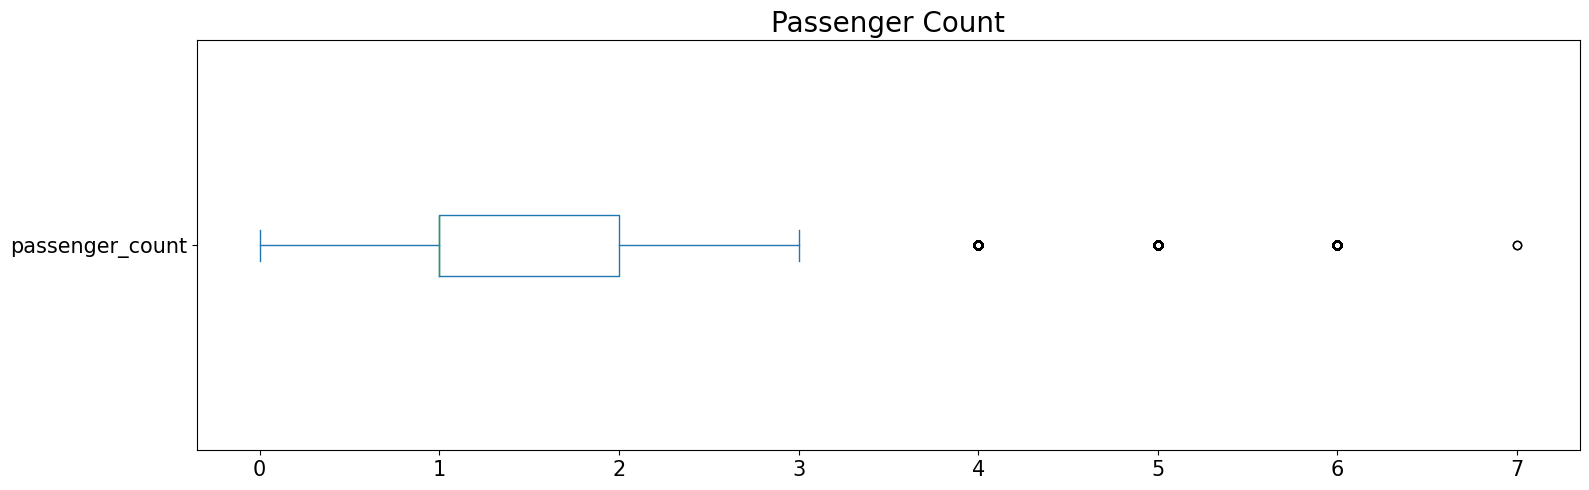

In [72]:
# Bar plot to visualize passenger count distribution
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
line = train_data['passenger_count'].value_counts().plot(kind='bar',fontsize = 15)
#line = sns.countplot(train_data.passenger_count)
line.set_ylabel(" Count",fontsize = 15)
line.set_xlabel("No. of Passenger ",fontsize = 15)
line.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()
# Box plot for passenger count
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
box = train_data['passenger_count'].plot(kind='box',vert = False,fontsize = 15)
box.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()

# 0 and more than 6 passenger are outliers as more than 6 would not be a regular car for taxi

In [73]:
train_data = train_data[~train_data['passenger_count'].isin([0, 7])]
val_data = val_data[~val_data['passenger_count'].isin([0, 7])]
test_data = test_data[~test_data['passenger_count'].isin([0, 7])]

# Checking the unique values of passenger count after cleaning

In [74]:
train_data['passenger_count'].unique()

array([1, 5, 2, 4, 3, 6], dtype=int64)

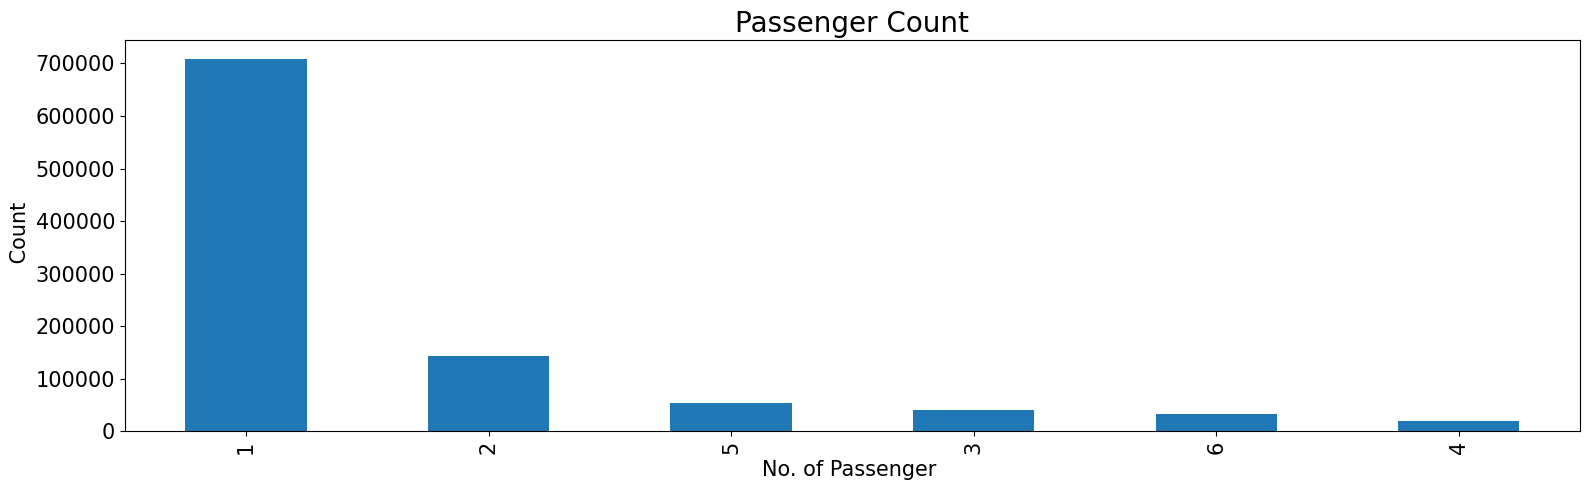

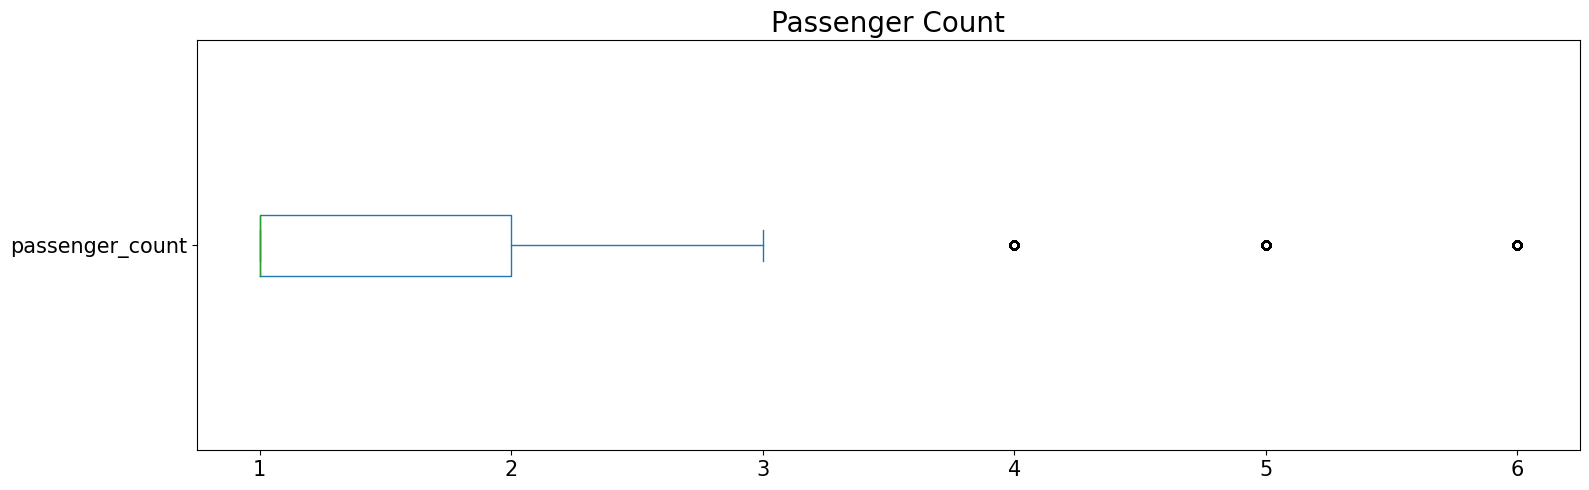

In [75]:
# Re-plotting passenger count distribution after removing invalid values
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
line = train_data['passenger_count'].value_counts().plot(kind='bar',fontsize = 15)
#line = sns.countplot(train_data.passenger_count)
line.set_ylabel(" Count",fontsize = 15)
line.set_xlabel("No. of Passenger ",fontsize = 15)
line.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()
# Re-plotting box plot for passenger count after cleaning
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
box = train_data['passenger_count'].plot(kind='box',vert = False,fontsize = 15)
box.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()

# Displaying the shape of the training data after cleaning

In [76]:
train_data.shape

(999960, 10)

In [77]:
# Log-transforming trip duration to normalize its distribution
train_data["log_trip_duraion"] =  np.log(train_data["trip_duration"])
# Calculating mean and standard deviation of the log-transformed trip duration
mean = np.mean(train_data["log_trip_duraion"])
std = np.std(train_data["log_trip_duraion"])
# Filtering out extreme log-transformed trip durations (values beyond 2 standard deviations)
train_data = train_data[train_data['log_trip_duraion'] <= mean + 2*std]
train_data = train_data[train_data['log_trip_duraion'] >= mean - 2*std]
# Log-transforming and filtering the validation data
val_data["log_trip_duraion"] = np.log(val_data["trip_duration"])
val_data = val_data[val_data['log_trip_duraion'] <= mean + 2*std]
val_data = val_data[val_data['log_trip_duraion'] >= mean - 2*std]
# Log-transforming and filtering the test data
test_data["log_trip_duraion"] = np.log(test_data["trip_duration"])
test_data = test_data[test_data['log_trip_duraion'] <= mean + 2*std]
test_data = test_data[test_data['log_trip_duraion'] >= mean - 2*std]

# Displaying the first two rows of the cleaned training data

In [78]:
train_data.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duraion
0,id2793718,2,2016-06-08 07:36:19,1,-73.99,40.74,-73.98,40.76,N,1040,6.95
1,id3485529,2,2016-04-03 12:58:11,1,-73.98,40.76,-73.99,40.75,N,827,6.72


# Checking the shape of the datasets after cleaning

In [79]:
train_data.shape

(963362, 11)

In [80]:
val_data.shape

(220883, 11)

In [81]:
test_data.shape

(220872, 11)

In [82]:
# Filtering rows where the pickup and dropoff locations are within specified geographical bounds
train_data = train_data[train_data['pickup_longitude'] <= -73.75]
train_data = train_data[train_data['pickup_longitude'] >= -74.03]
train_data = train_data[train_data['pickup_latitude'] <= 40.85]
train_data = train_data[train_data['pickup_latitude'] >= 40.63]
train_data = train_data[train_data['dropoff_longitude'] <= -73.75]
train_data = train_data[train_data['dropoff_longitude'] >= -74.03]
train_data = train_data[train_data['dropoff_latitude'] <= 40.85]
train_data = train_data[train_data['dropoff_latitude'] >= 40.63]

# Applying the same geographical bounds to the validation and test datasets
val_data = val_data[val_data['pickup_longitude'] <= -73.75]
val_data = val_data[val_data['pickup_longitude'] >= -74.03]
val_data = val_data[val_data['pickup_latitude'] <= 40.85]
val_data = val_data[val_data['pickup_latitude'] >= 40.63]
val_data = val_data[val_data['dropoff_longitude'] <= -73.75]
val_data = val_data[val_data['dropoff_longitude'] >= -74.03]
val_data = val_data[val_data['dropoff_latitude'] <= 40.85]
val_data = val_data[val_data['dropoff_latitude'] >= 40.63]

test_data = test_data[test_data['pickup_longitude'] <= -73.75]
test_data = test_data[test_data['pickup_longitude'] >= -74.03]
test_data = test_data[test_data['pickup_latitude'] <= 40.85]
test_data = test_data[test_data['pickup_latitude'] >= 40.63]
test_data = test_data[test_data['dropoff_longitude'] <= -73.75]
test_data = test_data[test_data['dropoff_longitude'] >= -74.03]
test_data = test_data[test_data['dropoff_latitude'] <= 40.85]
test_data = test_data[test_data['dropoff_latitude'] >= 40.63]

In [83]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Setting display format for floating-point numbers
train_data.describe()  # Displaying descriptive statistics of the training data

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duraion
count,951513.000,951513.000,951513.000,951513.000,951513.000,951513.000,951513.000,951513.000
mean,1.535,1.666,-73.975,40.752,-73.974,40.752,804.934,6.479
std,0.499,1.317,0.034,0.026,0.031,0.029,542.400,0.662
min,1.000,1.000,-74.030,40.630,-74.030,40.630,131.000,4.875
25%,1.000,1.000,-73.992,40.738,-73.991,40.736,408.000,6.011
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,661.000,6.494
75%,2.000,2.000,-73.968,40.768,-73.964,40.769,1049.000,6.956
max,2.000,6.000,-73.753,40.850,-73.750,40.850,3167.000,8.061


In [84]:
# Separating the target variable (log_trip_duraion) for training, validation, and testing datasets
y_train = train_data["log_trip_duraion"]
y_val = val_data["log_trip_duraion"]
y_test = test_data["log_trip_duraion"]
# Dropping the target variable from the feature set
train_data = train_data.drop(columns=['log_trip_duraion'])
val_data = val_data.drop(columns=['log_trip_duraion'])
test_data = test_data.drop(columns=['log_trip_duraion'])

# Adding a new feature: trip duration in hours

In [85]:
train_data['trip_duration_hours'] = train_data['trip_duration'] / 3600  
val_data['trip_duration_hours'] = val_data['trip_duration'] / 3600
test_data['trip_duration_hours'] = test_data['trip_duration'] / 3600

# Dropping the original trip duration column as it is no longer needed

In [86]:
train_data = train_data.drop(columns=['trip_duration'])
val_data = val_data.drop(columns=['trip_duration'])
test_data = test_data.drop(columns=['trip_duration'])

# Displaying the shapes of the datasets to verify the changes

In [87]:
train_data.shape

(951513, 10)

In [88]:
y_train.shape

(951513,)

In [89]:
# Converting pickup_datetime to datetime type
train_data['pickup_datetime'] = pd.to_datetime(train_data.pickup_datetime)
val_data['pickup_datetime'] = pd.to_datetime(val_data.pickup_datetime)
test_data['pickup_datetime'] = pd.to_datetime(test_data['pickup_datetime'])
# Extracting additional features from the datetime column
train_data.loc[:, 'pickup_date'] = train_data['pickup_datetime'].dt.date
val_data.loc[:, 'pickup_date'] = val_data['pickup_datetime'].dt.date
test_data.loc[:, 'pickup_date'] = test_data['pickup_datetime'].dt.date
# Adding a feature: minute of the day
train_data['minute_of_day'] = train_data['pickup_datetime'].dt.minute
val_data['minute_of_day'] = val_data['pickup_datetime'].dt.minute
test_data['minute_of_day'] = test_data['pickup_datetime'].dt.minute

In [90]:
# Adding a binary feature to indicate rush hour (morning and evening rush periods)
def is_rush_hour(hour):
    return (7 <= hour <= 10) or (16 <= hour <= 19)

train_data['rush_hour'] = train_data['pickup_datetime'].dt.hour.apply(is_rush_hour)
val_data['rush_hour'] = val_data['pickup_datetime'].dt.hour.apply(is_rush_hour)
test_data['rush_hour'] = test_data['pickup_datetime'].dt.hour.apply(is_rush_hour)

In [91]:
# Adding a categorical feature for the time period of the day (morning, afternoon, evening)
def get_time_period(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'

train_data['time_period'] = train_data['pickup_datetime'].dt.hour.apply(get_time_period)
val_data['time_period'] = val_data['pickup_datetime'].dt.hour.apply(get_time_period)
test_data['time_period'] = test_data['pickup_datetime'].dt.hour.apply(get_time_period)

In [92]:
# Converting categorical features (time_period and rush_hour) into dummy variables
train_data = pd.get_dummies(train_data, columns=['time_period', 'rush_hour'])
val_data = pd.get_dummies(val_data, columns=['time_period', 'rush_hour'])
test_data = pd.get_dummies(test_data, columns=['time_period', 'rush_hour'])

# Adding features for geographical distances

In [93]:
# 1. Haversine Distance: Straight-line distance between pickup and dropoff locations
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371    # Average radius of Earth in kilometers
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

# 2. Bearing Distance: Directional angle between pickup and dropoff locations 
def bearing_direction(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

# 3. Manhattan Distance: Sum of absolute distances along latitude and longitude
def manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_distance(lat1, lng1, lat1, lng2)
    b = haversine_distance(lat1, lng1, lat2, lng1)
    return a + b

# Adding calculated distances to the datasets

In [94]:
train_data.loc[:, 'distance_haversine'] = haversine_distance(train_data['pickup_latitude'].values, train_data['pickup_longitude'].values, train_data['dropoff_latitude'].values, train_data['dropoff_longitude'].values)
val_data.loc[:, 'distance_haversine'] = haversine_distance(val_data['pickup_latitude'].values, val_data['pickup_longitude'].values, val_data['dropoff_latitude'].values, val_data['dropoff_longitude'].values)
test_data.loc[:, 'distance_haversine'] = haversine_distance(test_data['pickup_latitude'].values,test_data['pickup_longitude'].values,test_data['dropoff_latitude'].values,test_data['dropoff_longitude'].values)

# Adding the direction feature

In [95]:
train_data.loc[:, "direction"] = bearing_direction(train_data["pickup_latitude"].values, train_data["pickup_longitude"].values, train_data["dropoff_latitude"].values, train_data["dropoff_longitude"].values)
val_data.loc[:, "direction"] = bearing_direction(val_data["pickup_latitude"].values, val_data["pickup_longitude"].values, val_data["dropoff_latitude"].values, val_data["dropoff_longitude"].values)
test_data.loc[:, "direction"] = bearing_direction(test_data["pickup_latitude"].values,test_data["pickup_longitude"].values,test_data["dropoff_latitude"].values,test_data["dropoff_longitude"].values)

# Adding Manhattan distance feature

In [96]:
train_data.loc[:, "manhattan_distance"] =  manhattan_distance(train_data["pickup_latitude"].values, train_data["pickup_longitude"].values, train_data["dropoff_latitude"].values, train_data["dropoff_longitude"].values)
val_data.loc[:, "manhattan_distance"] =  manhattan_distance(val_data["pickup_latitude"].values, val_data["pickup_longitude"].values, val_data["dropoff_latitude"].values, val_data["dropoff_longitude"].values)
test_data.loc[:, "manhattan_distance"] = manhattan_distance(test_data["pickup_latitude"].values,test_data["pickup_longitude"].values,test_data["dropoff_latitude"].values,test_data["dropoff_longitude"].values)

# Calculating average speed (distance divided by time)

In [97]:
train_data['average_speed'] = train_data['distance_haversine'] / train_data['trip_duration_hours']
val_data['average_speed'] = val_data['distance_haversine'] / val_data['trip_duration_hours']
test_data['average_speed'] = test_data['distance_haversine'] / test_data['trip_duration_hours']

In [98]:
# Descriptive statistics for average speed
speed_stats = train_data['average_speed'].describe()
print("\nAverage Speed Statistics:")
print(speed_stats)
# Adding a binary feature for traffic congestion (low speed indicates congestion)
threshold = speed_stats['25%']   # Using the 25th percentile as the congestion threshold
train_data['traffic_congestion'] = train_data['average_speed'].apply(lambda x: 1 if x < threshold else 0)
val_data['traffic_congestion'] = val_data['average_speed'].apply(lambda x: 1 if x < threshold else 0)
test_data['traffic_congestion'] = test_data['average_speed'].apply(lambda x: 1 if x < threshold else 0)

print("\nTrain Data Traffic Congestion Counts:")
train_data['traffic_congestion'].value_counts()
print("\nValidation Data Traffic Congestion Counts:")
print(val_data['traffic_congestion'].value_counts())
print("\nTest Data Traffic Congestion Counts:")
print(test_data['traffic_congestion'].value_counts())


Average Speed Statistics:
count   951513.000
mean        14.058
std          7.315
min          0.000
25%          9.069
50%         12.608
75%         17.389
max        318.580
Name: average_speed, dtype: float64

Train Data Traffic Congestion Counts:

Validation Data Traffic Congestion Counts:
traffic_congestion
0    163823
1     54407
Name: count, dtype: int64

Test Data Traffic Congestion Counts:
traffic_congestion
0    163635
1     54517
Name: count, dtype: int64


# Dropping trip_duration_hours as it is no longer needed

In [99]:
train_data.drop("trip_duration_hours", axis=1, inplace=True)
val_data.drop("trip_duration_hours", axis=1, inplace=True)
test_data.drop("trip_duration_hours", axis=1, inplace=True)

In [100]:
train_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,...,time_period_afternoon,time_period_evening,time_period_morning,rush_hour_False,rush_hour_True,distance_haversine,direction,manhattan_distance,average_speed,traffic_congestion
0,id2793718,2,2016-06-08 07:36:19,1,-73.986,40.736,-73.980,40.760,N,2016-06-08,...,False,False,True,False,True,2.763,9.261,3.172,9.564,0
1,id3485529,2,2016-04-03 12:58:11,1,-73.978,40.764,-73.992,40.750,N,2016-04-03,...,True,False,False,True,False,1.959,-145.332,2.726,8.528,1
2,id1816614,2,2016-06-05 02:49:13,5,-73.989,40.744,-73.973,40.749,N,2016-06-05,...,False,True,False,True,False,1.405,70.081,1.799,8.236,1
3,id1050851,2,2016-05-05 17:18:27,2,-73.990,40.731,-73.991,40.749,N,2016-05-05,...,True,False,False,False,True,1.979,-2.290,2.056,8.216,1
5,id2734699,2,2016-04-14 12:17:42,3,-73.970,40.769,-73.963,40.767,N,2016-04-14,...,True,False,False,True,False,0.625,104.309,0.760,6.012,1


In [101]:
# Extracting the month from 'pickup_datetime' and creating a new 'Month' column for training and validation datasets
train_data['Month'] = train_data['pickup_datetime'].dt.month
val_data['Month'] = val_data['pickup_datetime'].dt.month
# Extracting the day from 'pickup_datetime' and creating a new 'Day' column for training and validation datasets
train_data["Day"] = train_data.pickup_datetime.dt.day
val_data["Day"] = val_data.pickup_datetime.dt.day
# Extracting the hour from 'pickup_datetime' and creating a new 'Hour' column for training and validation datasets
train_data["Hour"] = train_data.pickup_datetime.dt.hour
val_data["Hour"] = val_data.pickup_datetime.dt.hour
#Extracting the day of the week from 'pickup_datetime' and creating a new 'Day_week' column for training and validation datasets
train_data["Day_week"] = train_data["pickup_datetime"].dt.dayofweek
val_data["Day_week"] = val_data["pickup_datetime"].dt.dayofweek
# Extracting the week number from 'pickup_datetime' and creating a new 'Week' column for training and validation datasets
train_data["Week"] = train_data.pickup_datetime.dt.isocalendar().week
val_data["Week"] = val_data.pickup_datetime.dt.isocalendar().week
# Extracting the month from 'pickup_datetime' and creating a new 'Month' column for the test dataset
test_data['Month'] = test_data['pickup_datetime'].dt.month
# Extracting the day from 'pickup_datetime' and creating a new 'Day' column for the test dataset
test_data["Day"] = test_data.pickup_datetime.dt.day
# Extracting the hour from 'pickup_datetime' and creating a new 'Hour' column for the test dataset
test_data["Hour"] = test_data.pickup_datetime.dt.hour
# Extracting the day of the week from 'pickup_datetime' and creating a new 'Day_week' column for the test dataset
test_data["Day_week"] = test_data["pickup_datetime"].dt.dayofweek
# Extracting the week number from 'pickup_datetime' and creating a new 'Week' column for the test dataset
test_data["Week"] = test_data.pickup_datetime.dt.isocalendar().week

# One-hot encoding the 'store_and_fwd_flag' column for training, validation, and test datasets

In [102]:
train_data = pd.get_dummies(train_data, columns=['store_and_fwd_flag'])
val_data = pd.get_dummies(val_data, columns=['store_and_fwd_flag'])
test_data = pd.get_dummies(test_data, columns=['store_and_fwd_flag'])

In [103]:
train_data.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_date,minute_of_day,...,manhattan_distance,average_speed,traffic_congestion,Month,Day,Hour,Day_week,Week,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,id2793718,2,2016-06-08 07:36:19,1,-73.986,40.736,-73.980,40.760,2016-06-08,36,...,3.172,9.564,0,6,8,7,2,23,True,False
1,id3485529,2,2016-04-03 12:58:11,1,-73.978,40.764,-73.992,40.750,2016-04-03,58,...,2.726,8.528,1,4,3,12,6,13,True,False


In [104]:
# Converting the 'store_and_fwd_flag_N' column to integer type (np.int64) for the training,validation and test datasets
train_data['store_and_fwd_flag_N'] = train_data['store_and_fwd_flag_N'].astype(np.int64)
val_data['store_and_fwd_flag_N'] = val_data['store_and_fwd_flag_N'].astype(np.int64)
test_data['store_and_fwd_flag_N'] = test_data['store_and_fwd_flag_N'].astype(np.int64)
# Converting the 'store_and_fwd_flag_Y' column to integer type (np.int64) for the training, validation and test datasets
train_data['store_and_fwd_flag_Y'] = train_data['store_and_fwd_flag_Y'].astype(np.int64)
val_data['store_and_fwd_flag_Y'] = val_data['store_and_fwd_flag_Y'].astype(np.int64)
test_data['store_and_fwd_flag_Y'] = test_data['store_and_fwd_flag_Y'].astype(np.int64)

In [105]:
train_data.dtypes

id                               object
vendor_id                         int64
pickup_datetime          datetime64[ns]
passenger_count                   int64
pickup_longitude                float64
pickup_latitude                 float64
dropoff_longitude               float64
dropoff_latitude                float64
pickup_date                      object
minute_of_day                     int32
time_period_afternoon              bool
time_period_evening                bool
time_period_morning                bool
rush_hour_False                    bool
rush_hour_True                     bool
distance_haversine              float64
direction                       float64
manhattan_distance              float64
average_speed                   float64
traffic_congestion                int64
Month                             int32
Day                               int32
Hour                              int32
Day_week                          int32
Week                             UInt32


In [106]:
from datetime import datetime, timedelta
from pandas.tseries.holiday import USFederalHolidayCalendar
# Creating an instance of the US Federal Holiday Calendar
calendar = USFederalHolidayCalendar()
# Getting the list of US Federal holidays
holidays = calendar.holidays()
# Creating a new column 'pickup_holiday' to mark if the pickup date is a holiday (1 if holiday, 0 otherwise)
train_data['pickup_holiday'] = pd.to_datetime(train_data.pickup_datetime.dt.date).isin(holidays)
train_data['pickup_holiday'] = train_data.pickup_holiday.map(lambda x: 1 if x == True else 0)
# Creating a new column 'pickup_near_holiday' to mark if the pickup date is near a holiday (1 if near, 0 otherwise)
# A pickup date is considered near a holiday if it is 1 day before or after a holiday
train_data['pickup_near_holiday'] = (pd.to_datetime(train_data.pickup_datetime.dt.date).isin(holidays + timedelta(days=1)) | pd.to_datetime(train_data.pickup_datetime.dt.date).isin(holidays - timedelta(days=1)))
# Mapping the boolean values to 1 and 0 for the 'pickup_near_holiday' column
train_data['pickup_near_holiday'] = train_data.pickup_near_holiday.map(lambda x: 1 if x == True else 0)

In [107]:
# Creating a new column 'pickup_holiday' in the validation dataset to mark if the pickup date is a holiday (1 if holiday, 0 otherwise)
val_data['pickup_holiday'] = pd.to_datetime(val_data.pickup_datetime.dt.date).isin(holidays)
val_data['pickup_holiday'] = val_data.pickup_holiday.map(lambda x: 1 if x == True else 0)
# Creating a new column 'pickup_near_holiday' in the validation dataset to mark if the pickup date is near a holiday (1 if near, 0 otherwise)
# A pickup date is considered near a holiday if it is 1 day before or after a holiday
val_data['pickup_near_holiday'] = (pd.to_datetime(val_data.pickup_datetime.dt.date).isin(holidays + timedelta(days=1)) | pd.to_datetime(val_data.pickup_datetime.dt.date).isin(holidays - timedelta(days=1)))
# Mapping the boolean values to 1 and 0 for the 'pickup_near_holiday' column in the validation dataset
val_data['pickup_near_holiday'] = val_data.pickup_near_holiday.map(lambda x: 1 if x == True else 0)

In [108]:
# Creating a new column 'pickup_holiday' in the test dataset to mark if the pickup date is a holiday (1 if holiday, 0 otherwise)
test_data['pickup_holiday'] = pd.to_datetime(test_data.pickup_datetime.dt.date).isin(holidays)
test_data['pickup_holiday'] = test_data.pickup_holiday.map(lambda x: 1 if x == True else 0)
# Creating a new column 'pickup_near_holiday' in the test dataset to mark if the pickup date is near a holiday (1 if near, 0 otherwise)
# A pickup date is considered near a holiday if it is 1 day before or after a holidaytest_data['pickup_near_holiday'] = (pd.to_datetime(test_data.pickup_datetime.dt.date).isin(holidays + timedelta(days=1)) | pd.to_datetime(test_data.pickup_datetime.dt.date).isin(holidays - timedelta(days=1)))
test_data['pickup_near_holiday'] = (pd.to_datetime(test_data.pickup_datetime.dt.date).isin(holidays + timedelta(days=1)) | 
                                     pd.to_datetime(test_data.pickup_datetime.dt.date).isin(holidays - timedelta(days=1)))
# Mapping the boolean values to 1 and 0 for the 'pickup_near_holiday' column in the test dataset
test_data['pickup_near_holiday'] = test_data.pickup_near_holiday.map(lambda x: 1 if x == True else 0)

In [109]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951513 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     951513 non-null  object        
 1   vendor_id              951513 non-null  int64         
 2   pickup_datetime        951513 non-null  datetime64[ns]
 3   passenger_count        951513 non-null  int64         
 4   pickup_longitude       951513 non-null  float64       
 5   pickup_latitude        951513 non-null  float64       
 6   dropoff_longitude      951513 non-null  float64       
 7   dropoff_latitude       951513 non-null  float64       
 8   pickup_date            951513 non-null  object        
 9   minute_of_day          951513 non-null  int32         
 10  time_period_afternoon  951513 non-null  bool          
 11  time_period_evening    951513 non-null  bool          
 12  time_period_morning    951513 non-null  bool     

In [110]:
# One-hot encoding the 'Hour' column for training, validation, and test datasets
train_data = pd.get_dummies(train_data, columns=['Hour'])
val_data = pd.get_dummies(val_data, columns=['Hour'])
test_data = pd.get_dummies(test_data, columns=['Hour'])

# One-hot encoding the 'Month' column for training, validation, and test datasets
train_data = pd.get_dummies(train_data, columns=['Month'])
val_data = pd.get_dummies(val_data, columns=['Month'])
test_data = pd.get_dummies(test_data, columns=['Month'])

# One-hot encoding the 'Day' column for training, validation, and test datasets
train_data = pd.get_dummies(train_data, columns=['Day'])
val_data = pd.get_dummies(val_data, columns=['Day'])
test_data = pd.get_dummies(test_data, columns=['Day'])

# One-hot encoding the 'Day_week' column for training, validation, and test datasets
train_data = pd.get_dummies(train_data, columns=['Day_week'])
val_data = pd.get_dummies(val_data, columns=['Day_week'])
test_data = pd.get_dummies(test_data, columns=['Day_week'])

In [111]:
train_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'pickup_date', 'minute_of_day',
       'time_period_afternoon', 'time_period_evening', 'time_period_morning',
       'rush_hour_False', 'rush_hour_True', 'distance_haversine', 'direction',
       'manhattan_distance', 'average_speed', 'traffic_congestion', 'Week',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'pickup_holiday',
       'pickup_near_holiday', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Day_7', 'Day_8',
       'Day_9', 'Day_10', 'Day_11', 'Day_12', '

# Scaling numeric features for model training

In [112]:
from sklearn.preprocessing import StandardScaler
numeric_features = ['passenger_count','minute_of_day','distance_haversine', 'direction','manhattan_distance','store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'pickup_holiday', 'pickup_near_holiday','average_speed','traffic_congestion']
scaler = StandardScaler()
train_data[numeric_features] = scaler.fit_transform(train_data[numeric_features])
val_data[numeric_features] = scaler.transform(val_data[numeric_features])
test_data[numeric_features] = scaler.transform(test_data[numeric_features])

# Dropping irrelevant columns

In [113]:
train_data.drop("pickup_date", axis=1, inplace=True)
val_data.drop("pickup_date", axis=1, inplace=True)
test_data.drop("pickup_date", axis=1, inplace=True)
train_data.drop("pickup_datetime", axis=1, inplace=True)
val_data.drop("pickup_datetime", axis=1, inplace=True)
test_data.drop("pickup_datetime", axis=1, inplace=True)
train_data.drop("id", axis=1, inplace=True)
val_data.drop("id", axis=1, inplace=True)
test_data.drop("id", axis=1, inplace=True)
train_data.drop("vendor_id", axis=1, inplace=True)
val_data.drop("vendor_id", axis=1, inplace=True)
test_data.drop("vendor_id", axis=1, inplace=True)
train_data.drop("Week", axis=1, inplace=True)
val_data.drop("Week", axis=1, inplace=True)
test_data.drop("Week", axis=1, inplace=True)

In [114]:
print(train_data.shape)  
print(y_train.shape)

(951513, 88)
(951513,)


# Training a Ridge regression model

In [115]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(train_data, y_train)

Ridge()

# Evaluating model performance

In [116]:
from sklearn.metrics import r2_score
y_pred_train = model.predict(train_data)
r2_train = r2_score(y_train, y_pred_train)
print(f"Training R^2: {r2_train:.4f}")

Training R^2: 0.7195


In [117]:
y_pred_valid = model.predict(val_data)
r2_valid = r2_score(y_val, y_pred_valid)
print(f"Validation R^2: {r2_valid:.4f}")

Validation R^2: 0.7207


In [118]:
y_pred_test = model.predict(test_data)
r2_test = r2_score(y_test, y_pred_test)
print(f"testing R^2: {r2_test:.4f}")

testing R^2: 0.7166
